## MLR

## Part 1 Data Preprocessing

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [8]:
# Initial inspection
print(df.head())
print(df.info())
print(df.describe())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null  

In [10]:
# Checking for missing values
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


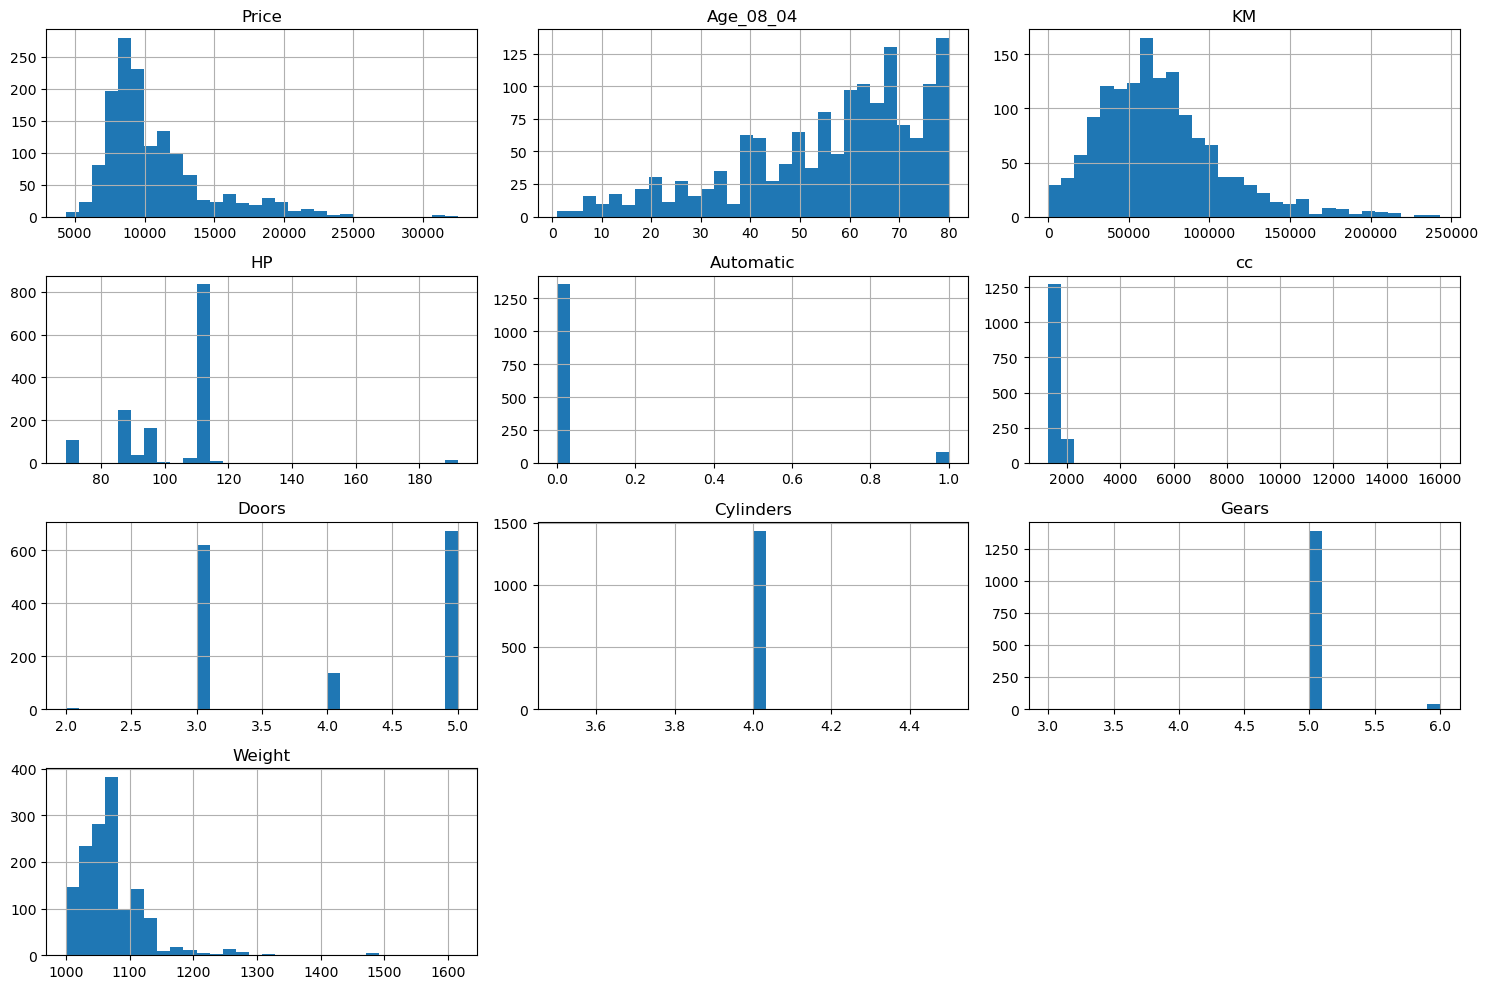

In [12]:
# Visualize distributions
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

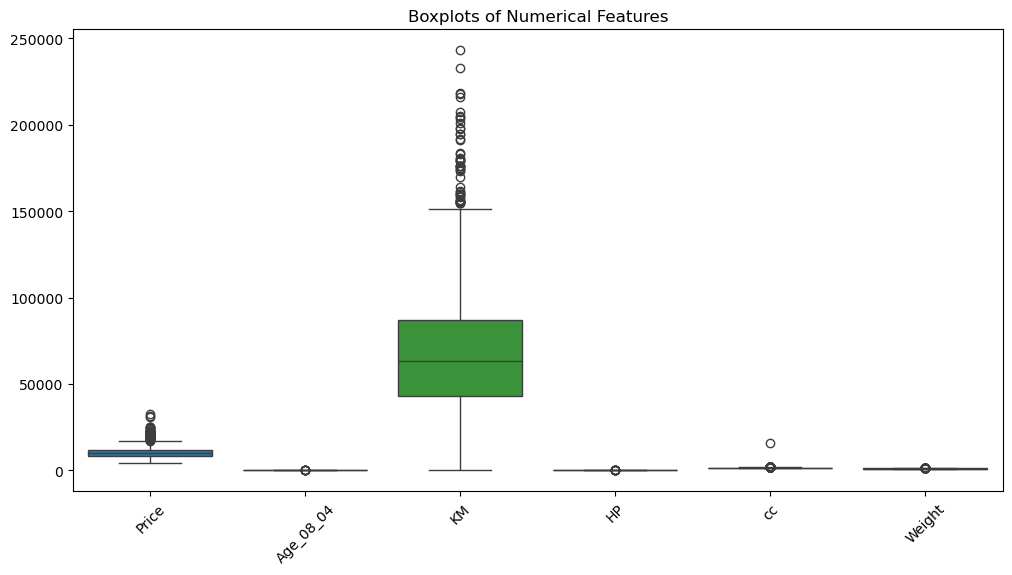

In [19]:
# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']])
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()

In [23]:
# Convert categorical variables to numeric
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True) 

In [25]:
# Clean/convert Doors column 
df['Doors'] = df['Doors'].replace('3-5', 4).astype(int)

#### Part 2 (Split Data)

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
# Features and target
X = df.drop(columns='Price')
y = df['Price']

In [33]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Part 3 (Build Multiple Linear Regression Models)

In [39]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [41]:
# Model 1: All features
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
print("Model 1 Coefficients:", dict(zip(X.columns, lr1.coef_)))

Model 1 Coefficients: {'Age_08_04': -120.83045817097121, 'KM': -0.016231410612674215, 'HP': 14.039478769759071, 'Automatic': 148.83092691182213, 'cc': -0.030372194607026344, 'Doors': -60.310974374988625, 'Cylinders': -1.1084466677857563e-12, 'Gears': 551.6007102659836, 'Weight': 25.884958313274517, 'Fuel_Type_Diesel': -68.54875675828676, 'Fuel_Type_Petrol': 1370.8089098159796}


In [51]:
# Model 2: Manually chosen subset
selected_features = ['Age_08_04', 'KM', 'Weight']
lr2 = LinearRegression()
lr2.fit(X_train[selected_features], y_train)

LinearRegression()

## Part 4 (Model Evalution)

In [84]:
from sklearn.metrics import root_mean_squared_error, r2_score

In [78]:
# Predict
y_pred1 = lr1.predict(X_test)
y_pred2 = lr2.predict(X_test[selected_features])

In [104]:
# Evaluation
print("Model 1 R2:", r2_score(y_test, y_pred1))
print("Model 1 RMSE:",root_mean_squared_error(y_test, y_pred1,))

Model 1 R2: 0.8348888040611082
Model 1 RMSE: 1484.2654153296514


In [102]:
print("Model 2 R2:", r2_score(y_test, y_pred2))
print("Model 2 RMSE:", root_mean_squared_error(y_test, y_pred2,))

Model 2 R2: 0.8324973071292439
Model 2 RMSE: 1494.9759401829615


## Part 5 (Lasso and Ridge Regularization)

In [107]:
from sklearn.linear_model import Lasso, Ridge

In [109]:
# Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
print("Lasso Coefficients:", dict(zip(X.columns, lasso.coef_)))

Lasso Coefficients: {'Age_08_04': -120.79803201881644, 'KM': -0.01632553410027897, 'HP': 14.55921996229931, 'Automatic': 133.40145416604526, 'cc': -0.03239882461911496, 'Doors': -58.67316094777725, 'Cylinders': 0.0, 'Gears': 522.1774765640038, 'Weight': 25.721963099346972, 'Fuel_Type_Diesel': -32.310125595393764, 'Fuel_Type_Petrol': 1364.3917073474245}


In [111]:
# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge Coefficients:", dict(zip(X.columns, ridge.coef_)))


Ridge Coefficients: {'Age_08_04': -120.77965945868526, 'KM': -0.016324079542572045, 'HP': 14.141834012008678, 'Automatic': 146.90746971609695, 'cc': -0.030509438556820367, 'Doors': -59.90579131646058, 'Cylinders': 0.0, 'Gears': 542.272328141472, 'Weight': 25.82101944161854, 'Fuel_Type_Diesel': -128.81307202317922, 'Fuel_Type_Petrol': 1294.9498258985768}


In [ ]:

''' Interview Questions
 *Que 1- Normalization & Standardization
 Normalization scales the features to a range between 0 and 1, whereas standardization scales the features so that they have mean 0 and standard deviation 1. 
 Both techniques help in improving the performance and convergence of machine learning algorithms, especially those based on gradient descent.

* Que 2- Techniques to address multicollinearity
 Remove one of the correlated variables.
 Combine the correlated variables into a single feature.
 Use dimensionality reduction techniques like Principal Component Analysis (PCA).
 Regularization techniques like Lasso and Ridge regression.

* Assumptions made during the analysis:
 The dataset is assumed to be representative of the population.
 There are no significant outliers in the dataset.
 The relationship between the independent variables and the dependent variable is linear.

* Implications of assumptions:
  Violation of these assumptions may lead to biased estimates and incorrect inferences. It's important to validate these assumptions before interpreting the results.'''